# Non-linear Regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

f = ['University Rating','GRE Score','CGPA']

In [27]:
# Metrics
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    RMSE = [mean_squared_error(y_train, model.predict(X_train),squared=False), mean_squared_error(y_test, y_pred, squared=False)]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Regression Tree

In [29]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        dt = DecisionTreeRegressor(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, dt.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, dt.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

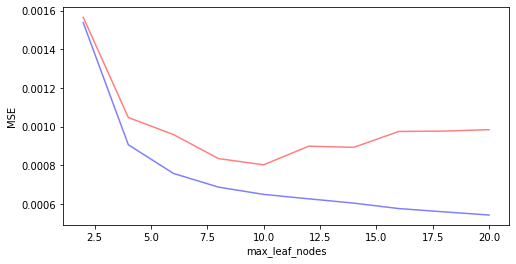

In [30]:
max_leaf_nodes(X_train[f], X_test[f], y_train, y_test, [2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

In [31]:
dt = DecisionTreeRegressor(max_leaf_nodes = 3).fit(X_train[f], y_train)
dt_y_pred = dt.predict(X_test[f])
metrics(X_train[f], X_test[f], y_train, y_test, dt_y_pred, dt).round(2)

,RMSE,R2
Train,0.03,0.62
Test,0.04,0.54


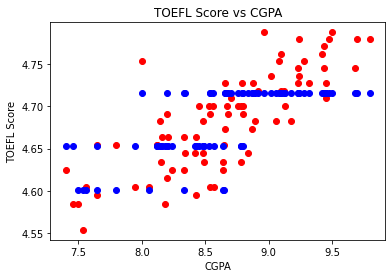

In [32]:
plt.scatter(X_test['CGPA'], y_test, color = 'red')
plt.plot(X_test['CGPA'], dt.predict(X_test[f]), 'bo')
plt.title('TOEFL Score vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

Text(0.5, 1.0, 'Tree. Feature Importance')

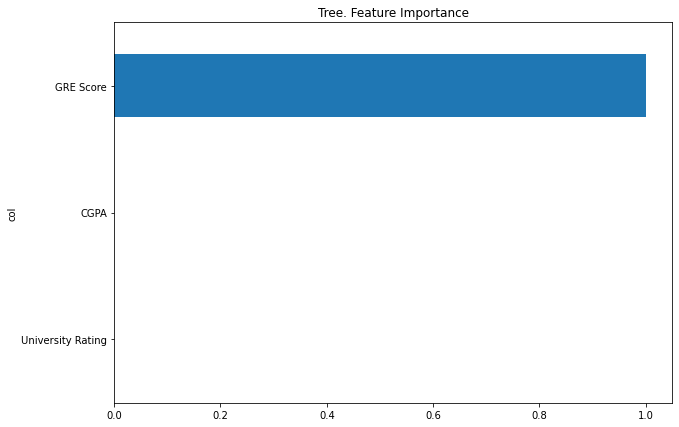

In [33]:
dt_imp = pd.DataFrame({'imp': dt.feature_importances_, 'col': X_train[f].columns})
dt_imp = dt_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-10:]
dt_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Tree. Feature Importance')

# Random Forest

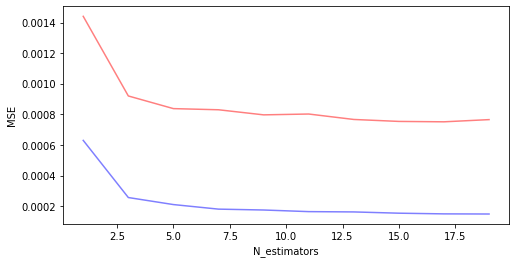

In [34]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")
from sklearn.ensemble import RandomForestRegressor    
rf_best_n_estimator(X_train[f], X_test[f], y_train, y_test, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19])

На графике видно что лес переобучен успешно

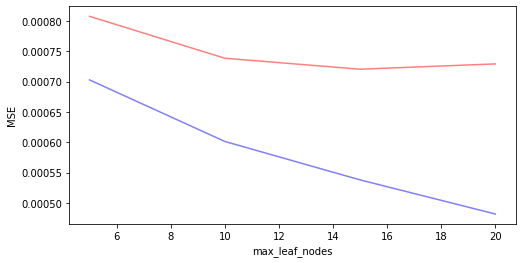

In [35]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=20, max_leaf_nodes =i, random_state=15).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")
rf_max_leaf_nodes(X_train[f], X_test[f], y_train, y_test, [ 5, 10, 15, 20])

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20, max_leaf_nodes = 4, random_state = 15).fit(X_train[f], y_train)
rf_y_pred = rf.predict(X_test[f])
metrics(X_train[f], X_test[f], y_train, y_test, rf_y_pred, rf).round(2)

,RMSE,R2
Train,0.03,0.76
Test,0.03,0.74


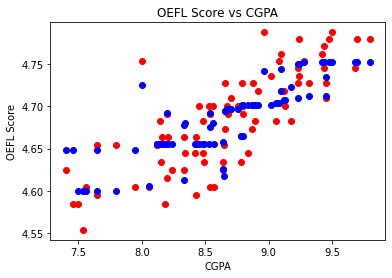

In [37]:
plt.scatter(X_test['CGPA'], y_test, color = 'red')
plt.plot(X_test['CGPA'], rf.predict(X_test[f]), 'bo')
plt.title('OEFL Score vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('OEFL Score')
plt.show() 

Text(0.5, 1.0, 'Random Forest. Feature Importance')

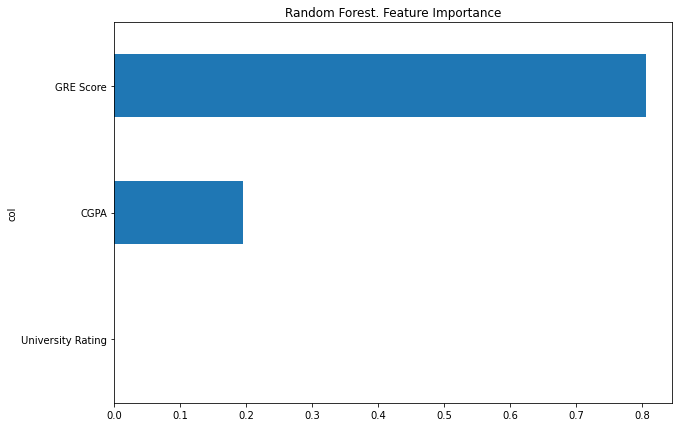

In [38]:
rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X_train[f].columns})
rf_imp = rf_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
rf_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Random Forest. Feature Importance')

# CatBoost

In [39]:
! pip install catboost

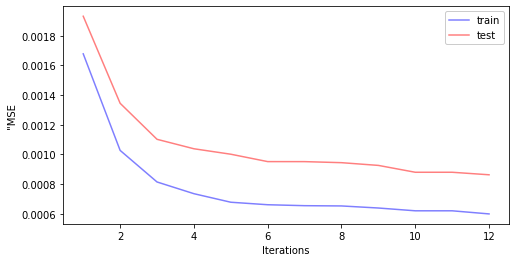

In [40]:
def catboost_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostRegressor(iterations=i,random_state=10,eval_metric='RMSE',loss_function='RMSE').fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostRegressor
catboost_best_n_estimator(X_train[f], X_test[f], y_train, y_test, list(range(1,13)))

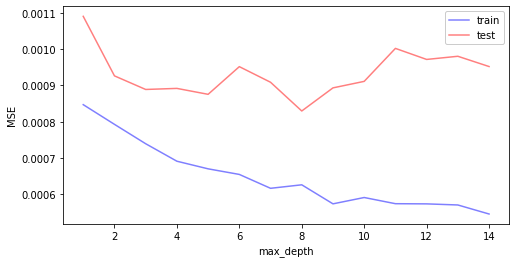

In [41]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostRegressor(iterations=7,max_depth=i,random_state=10,eval_metric='RMSE',loss_function='RMSE').fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train[f], X_test[f], y_train, y_test, list(range(1,15)))

In [42]:
cb = CatBoostRegressor(iterations=7,max_depth=9,random_state=10,eval_metric='RMSE',loss_function='RMSE').fit(X_train[f], y_train,eval_set=(X_test[f], y_test),logging_level='Silent')
cb_y_pred = cb.predict(X_test[f])
metrics(X_train[f], X_test[f], y_train, y_test, cb_y_pred, cb).round(2)

,RMSE,R2
Train,0.02,0.82
Test,0.03,0.73


Text(0.5, 1.0, 'Boosting. Feature Importance')

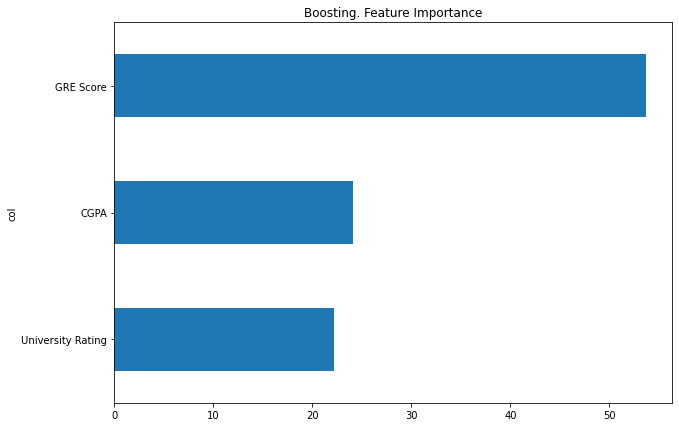

In [43]:
# Features importances
cb_imp = pd.DataFrame({'imp': cb.get_feature_importance(), 'col': X_train[f].columns})
cb_imp = cb_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
cb_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

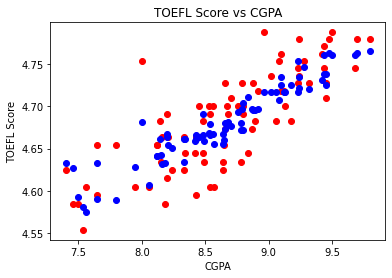

In [44]:
plt.scatter(X_test['CGPA'], y_test, color = 'red')
plt.plot(X_test['CGPA'], cb.predict(X_test[f]), 'bo')
plt.title('TOEFL Score vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

In [45]:
metric_dt = metrics(X_train[f], X_test[f], y_train,y_test, dt_y_pred, dt).round(2).abs()
metric_dt['Type'] = 'Tree'

metric_rf = metrics(X_train[f], X_test[f], y_train,y_test,  rf_y_pred, rf).round(2).abs()
metric_rf['Type'] = 'Random forest'

metric_cb = metrics(X_train[f], X_test[f], y_train,y_test, cb_y_pred, cb).round(2)
metric_cb['Type'] = 'Catboost'

metric = pd.concat([metric_dt,metric_rf,metric_cb])
metric

,RMSE,R2,Type
Train,0.03,0.62,Tree
Test,0.04,0.54,Tree
Train,0.03,0.76,Random forest
Test,0.03,0.74,Random forest
Train,0.02,0.82,Catboost
Test,0.03,0.73,Catboost


Выбирая из трёх моделей, мы выберем модель Catboost как наилучшую.

In [46]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data(2)_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()